# The Final Project in Statistics for Data Science with Python course

Project Scenario: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

-    Is there a significant difference in the median value of houses bounded by the Charles river or not? [(yes)](#T-test-for-independent-samples)

-    Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940? [(yes)](#ANOVA)

-    Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town? [(there IS a linear relationship)](#Pearson-Correlation)

-    What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes? [(DIS predictor HAS the impact on MEDV with coef. β<sub>1</sub> = 1.0916 ± 0.188)](#Regression-analysis)

## Table of contents

1.  [Initial preparation](#Initial-preparation)
2.  [**Task 1**: Familiarity with the dataset](#Task-1:-Familiarity-with-the-dataset)
3.  [**Task 2**: Descriptive Statistics and Visualizations](#Task-2:-Descriptive-Statistics-and-Visualizations)
4.  [**Task 3**: Answers to questions](#Task-3:-Answers-to-questions)

___

## Initial preparation

___

#### Import the required libraries we need for the lab.


In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [37]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

###### *Add your code below following the instructions given in the course to complete the peer graded assignment*


___

## __Task 1__: Familiarity with the dataset

___

| Feature   | Description |
|-----------|-------------|
| __CRIM__  | per capita crime rate by town |
| __ZN__    | proportion of residential land zoned for lots over 25,000 sq.ft. |
| __INDUS__ | proportion of non-retail business acres per town |
| __CHAS__  | Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
| __NOX__   | nitric oxides concentration (parts per 10 million) |
| __RM__    | average number of rooms per dwelling |
| __AGE__   | proportion of owner-occupied units built prior to 1940 |
| __DIS__   | weighted distances to five Boston employment centres |
| __RAD__   | index of accessibility to radial highways |
| __TAX__   | full-value property-tax rate per \$10,000 |
| __PTRATIO__ | pupil-teacher ratio by town |
| __LSTAT__ | % lower status of the population |
| __MEDV__  | Median value of owner-occupied homes in \$1000's |

#### Look at the given dataset:

In [39]:
boston_df.head(3)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7


#### Drop the first column:

In [41]:
boston_df = boston_df.drop(columns=['Unnamed: 0'])

#### Get general info:

In [43]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


All attributes have no empty values, everything has a numeric data type by default

#### Get basic statistics:

In [45]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


___

## __Task 2__: Descriptive Statistics and Visualizations

___

-    [For the "Median value of owner-occupied homes" provide a boxplot](#For-the-"Median-value-of-owner-occupied-homes"-provide-a-boxplot)
-    [Provide a bar plot for the Charles river variable](#Provide-a-bar-plot-for-the-Charles-river-variable)
-    [Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)](#Provide-a-boxplot-for-the-MEDV-variable-vs-the-AGE-variable)
-    [Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?](#Provide-a-scatter-plot-to-show-the-relationship-between-Nitric-oxide-concentrations-and-the-proportion-of-non-retail-business-acres-per-town)
-    [Create a histogram for the pupil to teacher ratio variable](#Create-a-histogram-for-the-pupil-to-teacher-ratio-variable)

___

### For the "Median value of owner-occupied homes" provide a boxplot

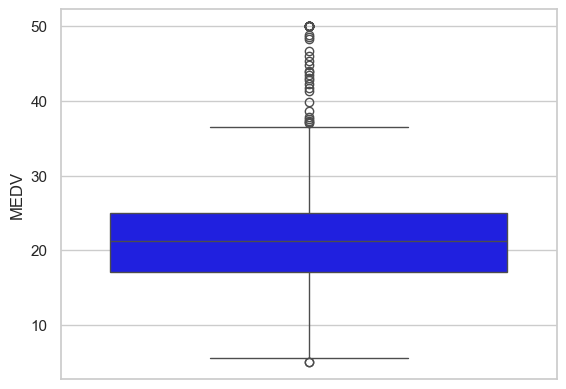

In [195]:
fig, ax = plt.subplots()
sns.boxplot(y='MEDV', color='blue', data=boston_df, ax=ax, legend=True)
plt.show()

#### Let's combine a boxplot with a histogram into one set

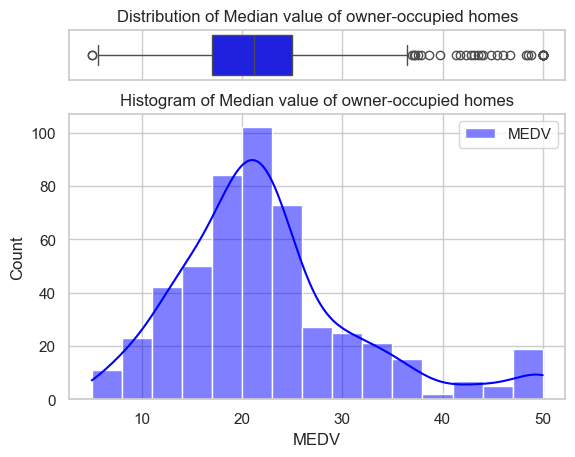

In [199]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x='MEDV', data=boston_df, ax=ax_box, color='blue', legend=False)
ax_box.set(xlabel='')
ax_box.set_title('Distribution of Median value of owner-occupied homes')

sns.histplot(boston_df['MEDV'], color='blue', bins=15, kde=True, ax=ax_hist, label='MEDV', alpha=0.5)

ax_hist.legend()
ax_hist.set_title('Histogram of Median value of owner-occupied homes')

plt.show()

By default in sns.boxplot(), the range of valid values ​​is:

<p>$$[ Q1-1.5\cdot IQR, Q3+1.5\cdot IQR ]$$</p>

Excluding outliers, we can say that the empirical distribution is almost symmetrical, visually close to normal.

### Provide a bar plot for the Charles river variable

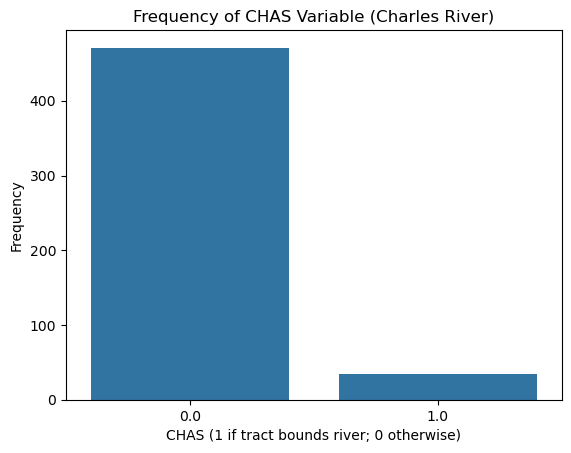

In [134]:
sns.countplot(x='CHAS', data=boston_df)

plt.title('Frequency of CHAS Variable (Charles River)')
plt.xlabel('CHAS (1 if tract bounds river; 0 otherwise)')
plt.ylabel('Frequency')

plt.show()

It is obvious that a house with direct access to the river is significantly smaller than a house without access.

### Provide a boxplot for the MEDV variable vs the AGE variable

Let's create groups by age:

In [292]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'

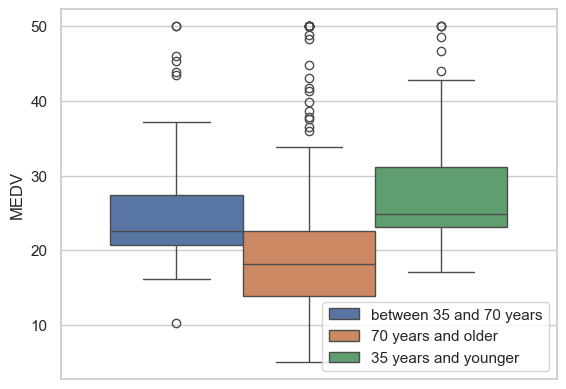

In [294]:
fig, ax = plt.subplots()
sns.boxplot(y='MEDV', hue='AGE_GROUP', data=boston_df, ax=ax, legend=True)
ax.legend()
plt.show()

Also compatible with histograms:

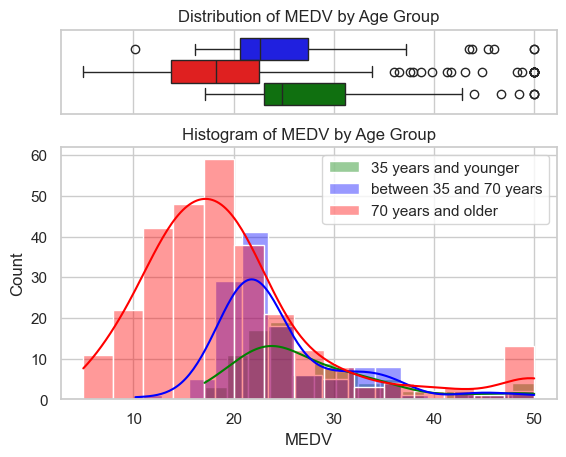

In [296]:
palette = {
    '35 years and younger': 'green',
    'between 35 and 70 years': 'blue',
    '70 years and older': 'red'
}

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})

# Boxplot
sns.boxplot(x='MEDV', hue='AGE_GROUP', data=boston_df, ax=ax_box, palette=palette, legend=False)
ax_box.set(xlabel='')
ax_box.set_title('Distribution of MEDV by Age Group')

# Histogram
for age_group, color in palette.items():
    sns.histplot(
        boston_df[boston_df['AGE_GROUP'] == age_group]['MEDV'], 
        color=color, bins=15, kde=True, 
        ax=ax_hist, label=age_group, alpha=0.4
    )

ax_hist.legend()
ax_hist.set_title('Histogram of MEDV by Age Group')

plt.show()

Visually, the group distributions of MEVD differ significantly, and this hypothesis will definitely need to be tested strictly.

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

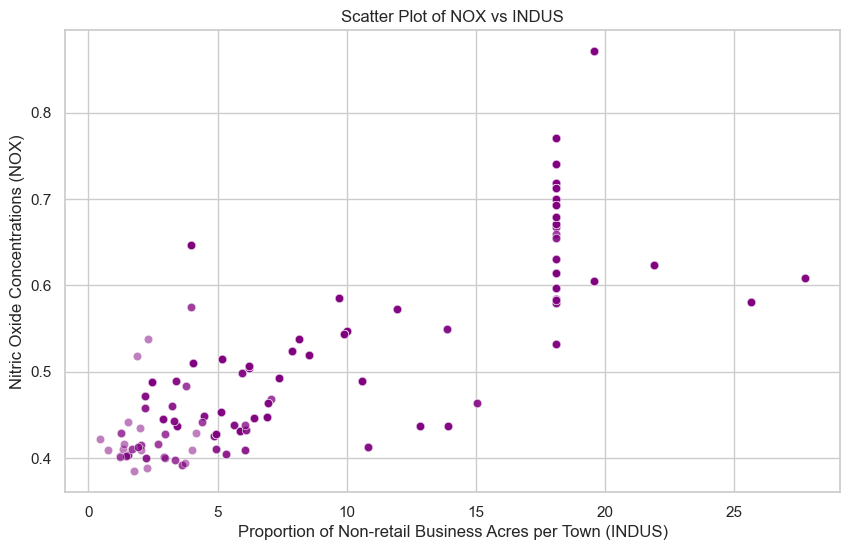

In [203]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, color='purple', alpha=0.5)

plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of Non-retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')

plt.show()

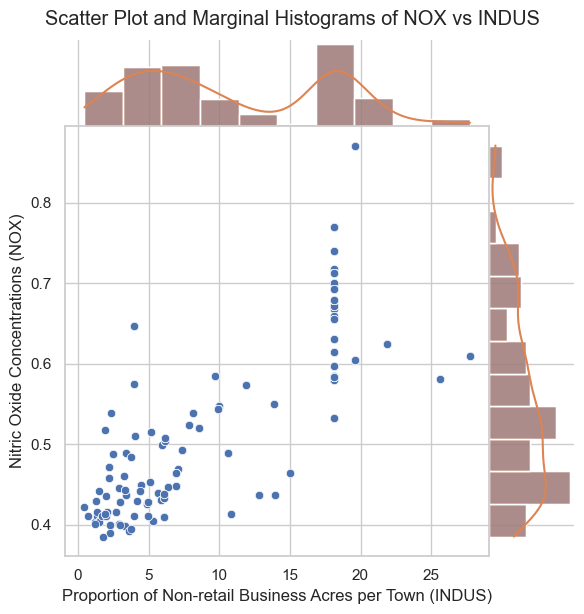

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.JointGrid(data=boston_df, x='INDUS', y='NOX', space=0)

g.plot(sns.scatterplot, sns.histplot)

g.plot_marginals(sns.histplot, kde=True)

g.fig.suptitle('Scatter Plot and Marginal Histograms of NOX vs INDUS', y=1.02)
g.set_axis_labels('Proportion of Non-retail Business Acres per Town (INDUS)', 'Nitric Oxide Concentrations (NOX)')

plt.show()

The scatterplot has a somewhat elongated shape, indicating a linear positive relationship between INDUS and NOX predictors.

On the other hand, the INDUS predictor looks heterogeneous, has a bimodal appearance, which may indicate the need for clustering this attribute. Using the OLS minimizer in regression analysis will give an incorrect result when determining the relationship between INDUS and NOX.

### Create a histogram for the pupil to teacher ratio variable

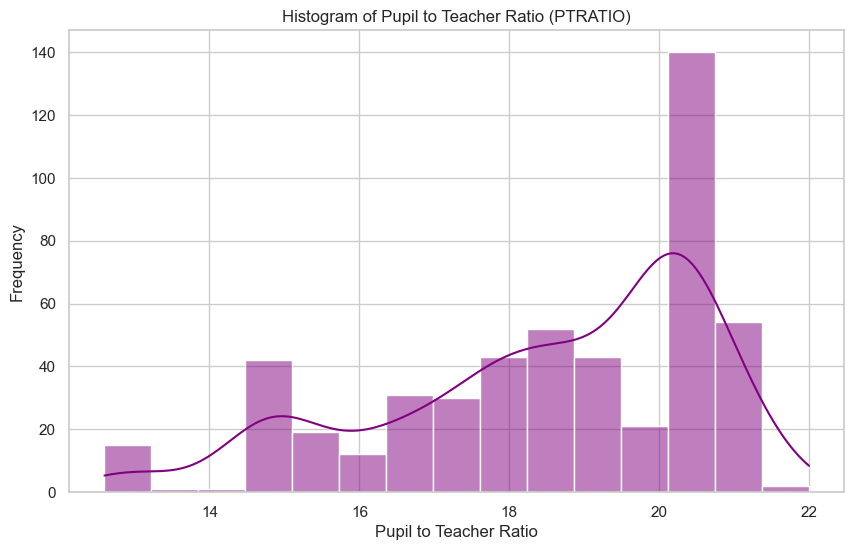

In [225]:
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True, color='purple')

plt.title('Histogram of Pupil to Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')

plt.show()

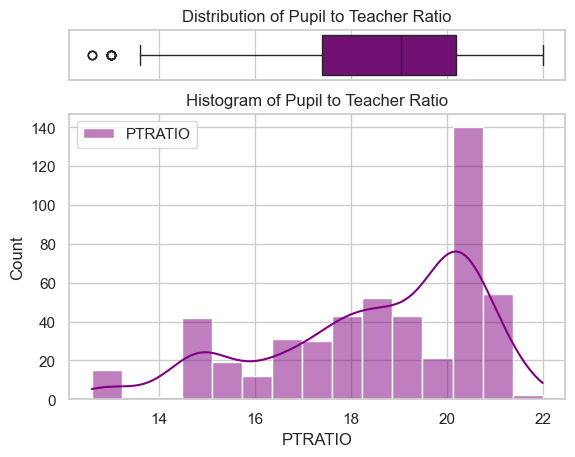

In [239]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x='PTRATIO', data=boston_df, ax=ax_box, color='purple', legend=False)
ax_box.set(xlabel='')
ax_box.set_title('Distribution of Pupil to Teacher Ratio')

sns.histplot(boston_df['PTRATIO'], color='purple', bins=15, kde=True, ax=ax_hist, label='PTRATIO', alpha=0.5)

ax_hist.legend()
ax_hist.set_title('Histogram of Pupil to Teacher Ratio')

plt.show()

The empirical distribution of PTRATION has a left (negative) asymmetry. This was also clear from the initial calculation of the basic descriptive statistics, since the mean is smaller than the median, and the minimum (and Q1) differs more from the median than the maximum (and Q3).

___

## __Task 3__: Answers to questions

___

-    Is there a significant difference in median value of houses bounded by the Charles river or not? [(T-test for independent samples)](#T-test-for-independent-samples)
-    Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? [(ANOVA)](#ANOVA)
-    Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? [(Pearson Correlation)](#Pearson-Correlation)
-    What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? [(Regression analysis)](#Regression-analysis)

___

### **T-test for independent samples**

## Significance test of group means of MEVD grouped by CHAS

Let us put forward a conservative and alternative hypothesis:

**H<sub>0</sub>**: the mean MEDV values ​​for the sample grouped by CHAS are the same

**H<sub>1</sub>**: there is a statistically significant difference between the mean MEDV values ​​for the sample grouped by CHAS

Let's show at the data

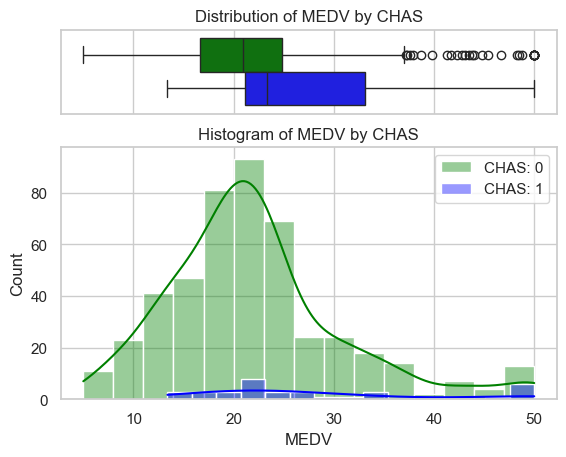

In [254]:
palette = {
    0: 'green',
    1: 'blue'
}

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})

# Boxplot
sns.boxplot(x='MEDV', hue='CHAS', data=boston_df, ax=ax_box, palette=palette, legend=False)
ax_box.set(xlabel='')
ax_box.set_title('Distribution of MEDV by CHAS')

# Histogram
for flag, color in palette.items():
    sns.histplot(
        boston_df[boston_df['CHAS'] == flag]['MEDV'], 
        color=color, bins=15, kde=True, 
        ax=ax_hist, label='CHAS: '+str(flag), alpha=0.4
    )

ax_hist.legend()
ax_hist.set_title('Histogram of MEDV by CHAS')

plt.show()

Let's check for difference of variance of MEDV by the Charles river or not

In [258]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

# since the p-value is greater than 0.05 we can assume equality of variance

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

p-value=0.003 that less than the accepted alpha=0.05, which means that we can assume **inequality of variance**

So we need to use **Welch’s t-test**, which we can provide giving False value to equal_var parameter:

In [269]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.0035671700981375174, df=36.876408797611994)

p-value=0.004 is less than the accepted alpha=0.05, which means that we should **reject the null hypothesis** and can say that the means of MEDV are statistically significantly different for houses with and without river access.

> **Conclusion:** The null hypothesis **H<sub>0</sub>** is rejected. The alternative hypothesis **H<sub>1</sub>** of inequality of means is accepted - group means are statistically significantly different.

___

### **ANOVA**

## Significance test of group means of MEDV grouped by AGE before 1940 and after

Apparently, conduct an analysis of group means, on the created categorical variable **AGE_GROUP**. Visually, in the [boxplot](#Provide-a-boxplot-for-the-MEDV-variable-vs-the-AGE-variable) one could notice non-intersecting medians and box boundaries, which could already suggest the idea of ​​checking group means.

Then the conservative and alternative hypotheses will be as follows:

**H<sub>0</sub>**: the mean MEDV values of all groups are equal to each other

**H<sub>1</sub>**: at least one group mean is statistically significantly different from the others

Let's perform a test for equality of group variances:

In [338]:
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

p-value=0.06 that more than the accepted alpha=0.05, which means that we can assume **equality of variance** (More precisely, there is no reason to reject the conservative hypothesis about equality of variance).

In [329]:
first_group = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
second_group = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
third_group = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

Run a one-way ANOVA:

In [343]:
f_statistic, p_value = scipy.stats.f_oneway(first_group, second_group, third_group)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


p-value~0.00 that much less than the accepted alpha=0.05, which tells us that the mean of at least one group is statistically significantly different from the overall means.

> **Conclusion:** The null hypothesis **H<sub>0</sub>** is rejected. The alternative hypothesis **H<sub>1</sub>** of inequality of means is accepted - one of group mean is statistically significantly different of others.

___

### **Pearson Correlation**

### Relationship between NOX and INDUS

As I have already noted above, it would not be entirely correct to pose the question this way, since the INDUS distribution is bimodal, and in this case one could try to use the mathematical apparatus of the M-Split algorithm, but in this project it is recommended to perform a simple analysis of the linear relationship.

Let us put forward a conservative and alternative hypothesis:

**H<sub>0</sub>**: there is no linear correlation between NOX and INDUS

**H<sub>1</sub>**: there is a statistically significant correlation between NOX and INDUS

In [356]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

p-value~0.00 that much less than the accepted alpha=0.05, which tells us that the linear correlation between NOX and INDUS is statistically significant.

> **Conclusion:** The null hypothesis **H<sub>0</sub>** is rejected. The alternative hypothesis **H<sub>1</sub>** of a statistically significant correlation between NOX and INDUS is accepted.

___

### **Regression analysis**

### Determining the influence of DIS on MEDV

Let us define the conservative and alternative hypotheses as follows (which is equivalent to hypotheses for testing correlation):

**H<sub>0</sub>**: β<sub>1</sub> = 0 (DIS has no effect on MEDV)

**H<sub>1</sub>**: β<sub>1</sub> is not equal to 0 (DIS has a statistically significant effect on MEDV)

In [376]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        00:51:50   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

β<sub>1</sub> = 1.0916 with standart error m<sub>β<sub>1</sub></sub>=0.188 and p-value~0, which means that the DES predictor has a statistically significant effect on MEDV.

> **Conclusion:** The null hypothesis **H<sub>0</sub>** is rejected. The alternative hypothesis **H<sub>1</sub>** of a statistically significant linear influes DES predictor on MEDV with β<sub>1</sub> = 1.0916 and standart error m<sub>β<sub>1</sub></sub>=0.188 is accepted.

___

## Author
> Anton Bannikov [(my GIT)](https://github.com/Anton-Geo)

___

## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2024-11-03  | 1.0  | Anton Bannikov  |  Created the initial version of the project |

This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/).